# Unit 5 - Financial Planning

In [79]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [80]:
# Load .env enviroment variables
load_dotenv("../JFAPI.env")

True

In [81]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [15]:
# Set current amount of crypto assets
crypto_data = {
    "crypto amounts": [1.2, 5.3]
}
# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame
df_crypto = pd.DataFrame(crypto_data, index=tickers)

# Display shares data
df_crypto

,crypto amounts
BTC,1.2
ETH,5.3


In [16]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [17]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()

# Fetch current ETH price
eth_price = requests.get(eth_url).json()

btc_quote = btc_price['data']['1']['quotes']['USD']['price']
eth_quote = eth_price['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
btc_value = round(float(btc_quote) * df_crypto.loc["BTC"],2)
eth_value = round(float(eth_quote) * df_crypto.loc["ETH"],2)

# Print current crypto wallet balance
print(f"The current value of your {df_crypto.loc['BTC']} BTC is ${btc_value}",2)
print(f"The current value of your {df_crypto.loc['ETH']} ETH is ${eth_value}",2)

The current value of your crypto amounts    1.2
Name: BTC, dtype: float64 BTC is $crypto amounts    46591.2
Name: BTC, dtype: float64 2
The current value of your crypto amounts    5.3
Name: ETH, dtype: float64 ETH is $crypto amounts    11083.57
Name: ETH, dtype: float64 2


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("Alpaca_API_Key")
alpaca_secret_key = os.getenv("Alpaca_Secret_Key")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2023-12-1", tz="America/New_York").isoformat()
today

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# Get current price data for MSFT and AAPL
closing_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = closing_prices[closing_prices['symbol']=='AGG'].drop('symbol', axis=1)
SPY = closing_prices[closing_prices['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
closing_prices = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
closing_prices

AGG                                             \
                           close    high    low trade_count  open    volume   
timestamp                                                                     
2023-12-01 05:00:00+00:00  96.83  96.869  95.97       50388  96.0  11758870   

                                        SPY                              \
                                vwap  close    high     low trade_count   
timestamp                                                                 
2023-12-01 05:00:00+00:00  96.494807  459.1  459.65  455.16      597247   

                                                       
                             open    volume      vwap  
timestamp                                              
2023-12-01 05:00:00+00:00  455.77  88146655  457.8619

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(closing_prices["AGG"]["close"])
spy_close_price = float(closing_prices["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.83
Current SPY closing price: $459.1


In [11]:
# Compute the current value of shares
my_agg_value = float(closing_prices["AGG"]["close"])*(my_agg)
my_spy_value = float(closing_prices["SPY"]["close"])*(my_spy)

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $19366.00
The current value of your 50 SPY shares is $22955.00


### Savings Health Analysis

In [74]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
btc_value = float(btc_value)
eth_value = float(eth_value)

crypto_savings = btc_value + eth_value
equity_savings = my_agg_value + my_spy_value
consolidated_savings = [crypto_savings, equity_savings]

# Create savings DataFrame
total_savings = pd.DataFrame(consolidated_savings, columns=["Total Savings"], index=["crypto", "stock/bond"])
total_savings.sort_index(inplace=True)

# Display savings DataFrame
total_savings

,Total Savings
crypto,57674.0
stock/bond,22166.0


<Axes: title={'center': 'Cryptocurrency and Stocks/Bonds Proportions'}, ylabel='Total Savings'>

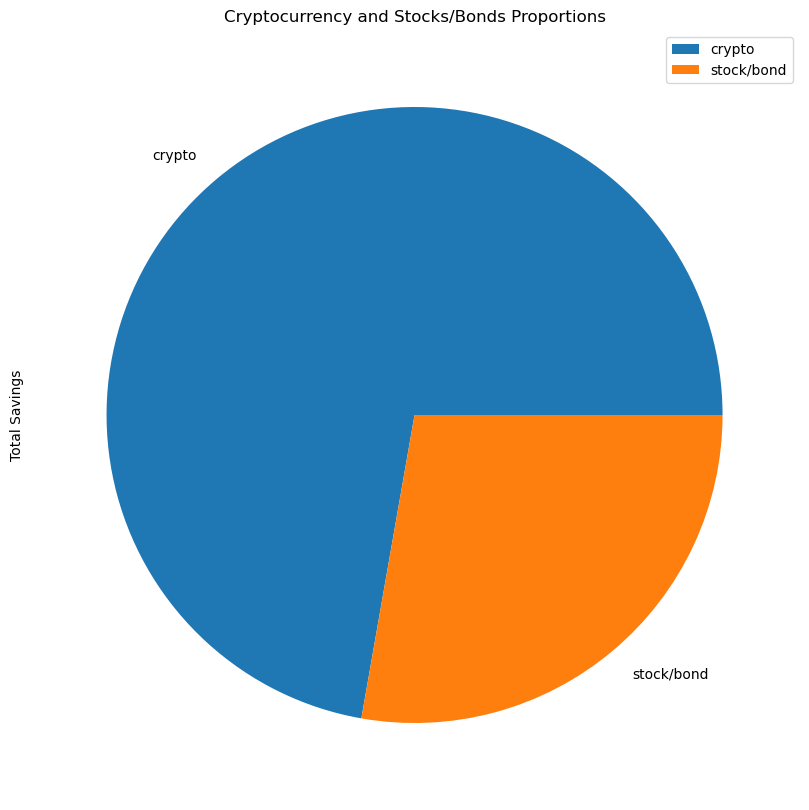

In [68]:
# Plot savings pie chart
total_savings.plot(kind="pie", y="Total Savings", title="Cryptocurrency and Stocks/Bonds Proportions", figsize=(10,10))

In [75]:
# Creates a variable named emergency_fund_value
emergency_fund = monthly_income * 3

# Calculate total savings
all_savings = crypto_savings + equity_savings

# Evaluate the status of Savings vs. Emergency Fund
if all_savings > emergency_fund:
    print("Congratulations! You have more than enough money for an emergency fund!")
elif all_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal!")
elif all_savings < emergency_fund:
    print(f"You are ${emergency_fund - all_savings} away from your goal.")

Congratulations! You have more than enough money for an emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [83]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

# Set the ticker information
tickers = ["AGG","SPY"]

# Sets number of rows to 1000
limit_rows = 1000

In [85]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [102]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_df_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [103]:
# Printing the simulation input data
MC_df_stock_data.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [104]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_df_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998724,0.984888,0.998100,1.000775,1.007340,0.989620,1.000181,1.000782,0.997102,1.000444,...,1.001433,1.013675,1.006922,1.006174,0.989947,0.992364,1.000676,1.011938,1.003409,0.996560
2,1.011285,0.986966,0.996895,1.007227,0.999995,0.995543,1.000334,1.002535,1.009125,0.988250,...,1.004473,1.009600,1.004649,0.994983,0.996879,0.992061,0.997675,1.003850,1.002014,1.001905
3,1.009560,0.996366,0.996874,1.011527,1.012154,0.990508,0.997232,1.008547,0.998599,0.998548,...,1.001119,1.011841,0.997532,0.987275,0.993221,1.000503,0.999106,1.004407,1.003472,1.007106
4,1.011281,0.995432,1.011946,1.004582,0.993554,1.003802,0.998569,1.021344,1.008077,0.999980,...,0.997737,1.010983,0.999546,0.994584,0.991870,0.990666,1.004582,0.988210,0.993805,1.005477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,43.091233,16.465386,36.800382,15.140478,15.636866,16.157411,14.382834,19.631889,10.636365,7.166478,...,37.781643,5.942579,7.433300,8.940124,13.196063,33.681432,4.954370,3.867489,13.329073,7.361340
7557,43.579522,16.348372,36.752167,15.275758,15.727905,16.218756,14.419777,19.758820,10.710565,7.065941,...,37.875887,5.912663,7.430765,9.013975,13.317720,33.556661,4.968481,3.867750,13.190081,7.440691
7558,43.829059,16.442160,36.734673,15.217571,15.855328,16.166012,14.167281,19.834734,10.654707,7.022868,...,37.830524,5.929959,7.477479,9.065171,13.350214,33.744923,5.009753,3.877915,13.305505,7.383532
7559,43.976062,16.386291,36.616821,15.099631,15.893884,16.226359,14.201613,19.970916,10.806773,6.920434,...,38.000848,5.965340,7.455728,9.001225,13.329076,33.690356,5.028079,3.861507,13.209148,7.450752


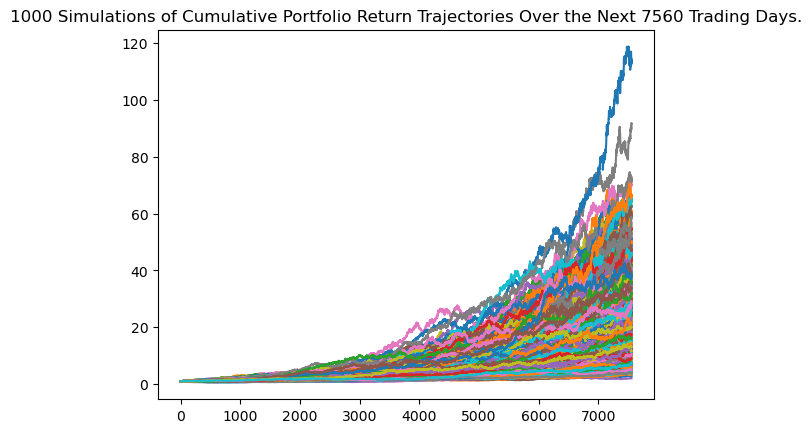

In [105]:
# Plot simulation outcomes
line_plot = MC_df_stock_data.plot_simulation()

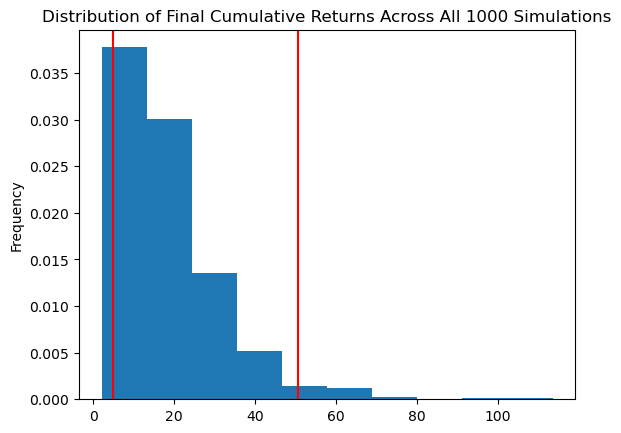

In [106]:
# Plot probability distribution and confidence intervals
dist_plot = MC_df_stock_data.plot_distribution()

### Retirement Analysis

In [107]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean              18.688139
std               12.354811
min                2.081451
25%               10.256580
50%               15.026530
75%               24.054341
max              113.565161
95% CI Lower       4.854883
95% CI Upper      50.636114
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [108]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97097.66 and $1012722.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [109]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $145646.5 and $1519083.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [110]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [111]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996309,1.010090,1.008438,0.998645,0.989999,1.002259,1.001214,0.987850,0.993708,1.000439,...,1.009889,0.984373,1.000843,1.008439,0.996436,0.996823,1.012280,0.990240,1.010221,0.999627
2,1.003071,1.026961,1.023054,0.992548,0.988885,0.988727,1.006958,0.992466,0.993977,1.005870,...,0.999055,0.980484,0.992863,1.005215,0.981136,0.996914,1.017242,0.987888,1.015964,1.002369
3,1.005498,1.031126,1.018708,0.994651,0.983941,1.000394,1.015599,0.990343,0.987957,1.001240,...,1.000776,0.983401,1.004585,1.002603,0.973639,1.007271,1.022381,0.994633,1.011943,1.008370
4,1.015290,1.032898,1.019984,0.996287,0.977893,0.996629,1.024332,0.992515,0.984689,0.993787,...,0.991961,0.981810,1.000433,1.007797,0.969843,1.014569,1.025317,1.000022,1.000281,1.008150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.255136,1.056927,1.959519,1.507239,1.547559,1.104859,1.655989,1.794971,1.376815,1.775104,...,1.568214,1.148728,1.318655,1.859409,1.528083,2.041970,1.863428,1.640180,1.623370,1.159827
1257,1.260174,1.059204,1.961154,1.508459,1.544580,1.098683,1.654570,1.804902,1.380147,1.771992,...,1.560116,1.141185,1.314103,1.849780,1.528308,2.067583,1.883171,1.636605,1.612904,1.158729
1258,1.265465,1.056371,1.951786,1.495686,1.560791,1.099704,1.645073,1.802981,1.379684,1.758942,...,1.571231,1.132510,1.308671,1.869225,1.510783,2.063750,1.889578,1.651629,1.591259,1.158566
1259,1.272884,1.040747,1.953238,1.500488,1.560886,1.116776,1.648388,1.813257,1.386624,1.756180,...,1.585350,1.133882,1.307184,1.877132,1.521548,2.048162,1.904500,1.668701,1.580797,1.166561


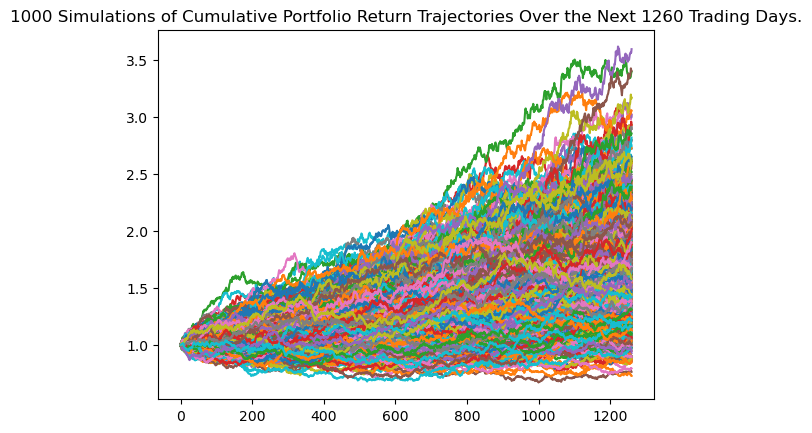

In [112]:
# Plot simulation outcomes
line_plot = MC_df_stock_data.plot_simulation()

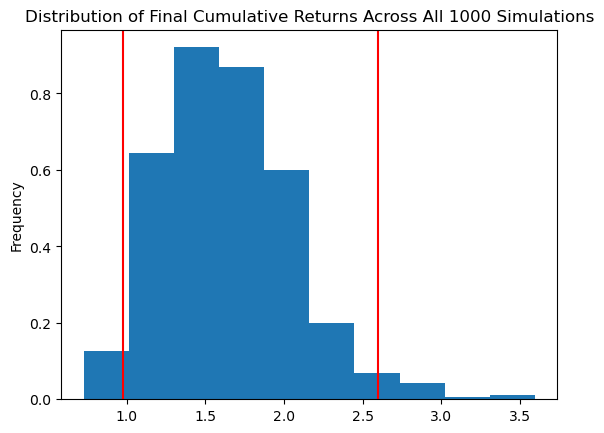

In [113]:
# Plot probability distribution and confidence intervals
dist_plot = MC_df_stock_data.plot_distribution()

In [114]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.638619
std                0.417093
min                0.727697
25%                1.351351
50%                1.601028
75%                1.895245
max                3.595081
95% CI Lower       0.977202
95% CI Upper       2.599923
Name: 1260, dtype: float64


In [123]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*50000,2)
ci_upper_five = round(even_tbl[9]*50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $63825.88 and $247828.08


### Ten Years Retirement Option

In [117]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_df_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [118]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_df_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008961,0.997551,1.009006,0.993963,1.014566,1.004846,0.986021,1.007476,1.009585,1.001818,...,0.996041,1.002136,1.005121,0.992855,1.005455,0.997457,0.996503,0.997323,0.998335,1.006029
2,1.015996,1.007265,1.011264,1.000842,0.998551,1.010848,0.981859,1.008405,1.011497,1.009721,...,0.983479,1.008444,1.005096,0.994500,1.015517,0.993571,0.997483,0.994136,0.988268,1.015308
3,1.004538,1.019652,1.011729,0.991795,0.998405,1.024548,0.988468,1.008740,1.018048,1.007830,...,0.978238,1.003721,1.006962,0.999937,1.017138,0.992703,0.989745,0.994693,0.978461,1.011565
4,1.018369,1.015573,1.000506,0.990370,0.997199,1.029711,0.996412,1.005697,1.035381,1.008083,...,0.967123,1.007217,1.014766,1.013191,1.018831,0.982772,0.988628,1.002252,0.984251,1.001378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.982764,2.933150,3.271477,3.146716,1.639435,3.669949,3.106367,2.786364,3.663854,1.623175,...,2.873431,1.249819,2.604828,1.465813,3.983936,1.882920,3.195811,2.881350,2.085932,3.003986
2517,1.993069,2.918457,3.315890,3.139251,1.625456,3.630529,3.094347,2.811750,3.674526,1.630866,...,2.874782,1.245087,2.614389,1.469938,3.960308,1.896235,3.198252,2.877726,2.128046,2.980212
2518,1.997082,2.922597,3.264323,3.144626,1.628545,3.668262,3.082611,2.807029,3.675901,1.635239,...,2.887309,1.239986,2.637681,1.463480,3.963522,1.905129,3.198822,2.885170,2.115828,2.999402
2519,2.003834,2.922953,3.250157,3.168946,1.637402,3.693667,3.078049,2.816803,3.646245,1.655436,...,2.885849,1.241871,2.651249,1.473269,3.942330,1.904829,3.213183,2.888122,2.097059,3.020192


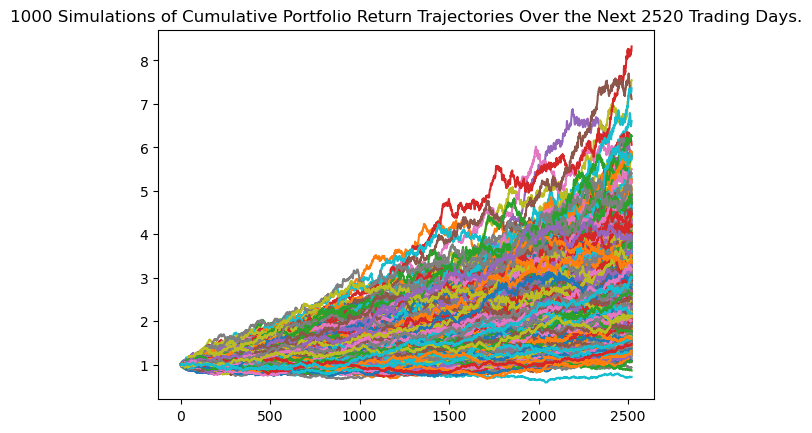

In [120]:
# Plot simulation outcomes
line_plot = MC_df_stock_data.plot_simulation()

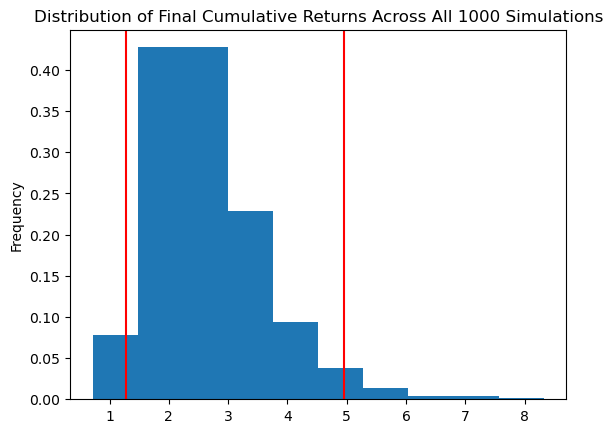

In [121]:
# Plot probability distribution and confidence intervals
dist_plot = MC_df_stock_data.plot_distribution()

In [122]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               2.653806
std                0.960229
min                0.718293
25%                2.005459
50%                2.481023
75%                3.104056
max                8.320521
95% CI Lower       1.276518
95% CI Upper       4.956562
Name: 2520, dtype: float64


In [124]:
#### Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*40000,2)
ci_upper_ten = round(even_tbl[9]*40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $51060.7 and $198262.47
